# Argumentation Mining in US Presidential Debates 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [5]:
filename = 'updated_csv.csv'
df = pd.read_csv(filename)

## Task 1: Arguments vs Non-Arguements 

In [12]:
classes = []

for s in df.Annotation:
    if s == 'None':
        classes.append(0.0)
    else:
        classes.append(1.0)

In [15]:
df.Annotation = classes

In [25]:
print ('We now have', len(df), 'sentences in total')

We now have 36201 sentences in total


### Some statistics 

In [ ]:
# to do: 

In [17]:
df.head(20)

,Index,Sentences,Annotation
0,7,Good evening.,0.0
1,21,The television and radio stations of the Unite...,0.0
2,247,The candidates need no introduction.,0.0
3,284,"The Republican candidate, Vice President Richa...",0.0
4,398,According to rules set by the candidates thems...,0.0
5,599,"In between the candidates will answer, or comm...",0.0
6,709,"In this, the first discussion in a series of f...",0.0
7,879,And now for the first opening statement by Sen...,0.0
8,956,"Mr. Smith, Mr. Nixon.",0.0
9,978,"In the election of 1860, Abraham Lincoln said ...",0.0


/Users/mariap/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


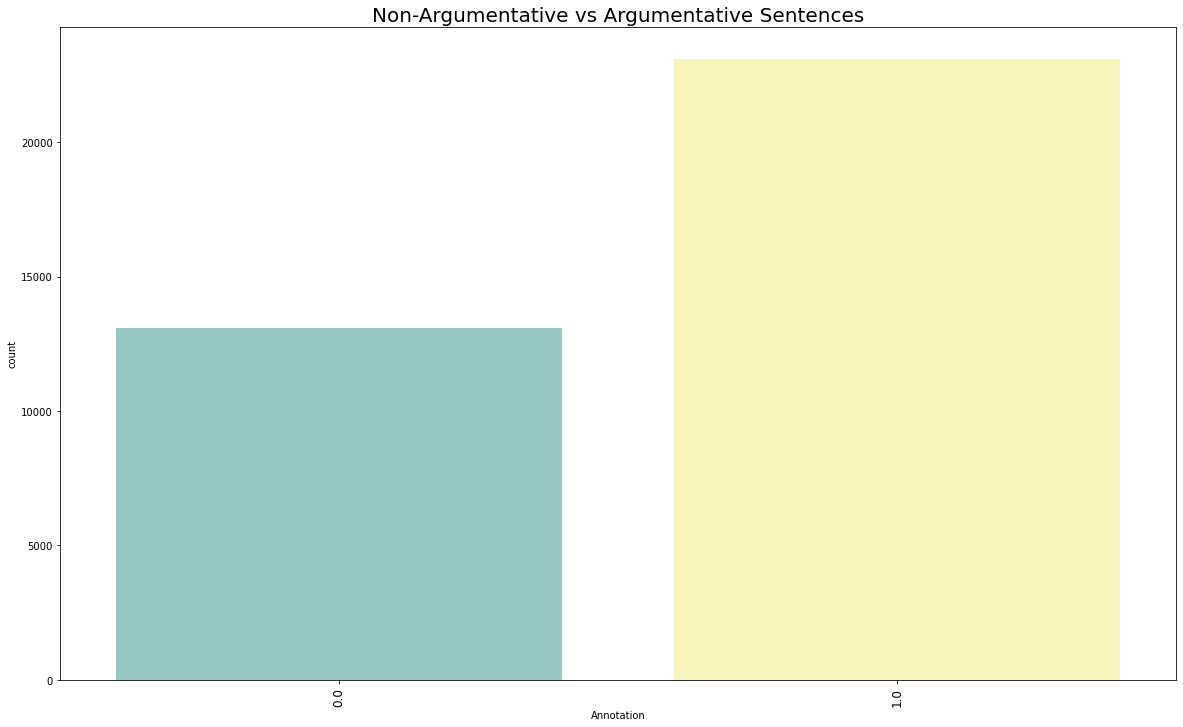

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(df.Annotation.sort_values(), palette="Set3")
plt.title("Non-Argumentative vs Argumentative Sentences",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentences'], df['Annotation'], test_size=0.3, shuffle=True)

In [27]:
vectorizer = TfidfVectorizer(max_df=0.87,
               smooth_idf=1, max_features=300000)

#tf-idf
train_vecs =  vectorizer.fit_transform(X_train)
test_vecs = vectorizer.transform(X_test)

In [30]:
svm = SVC(kernel='linear', random_state = 1)
svm.fit(train_vecs, y_train)

SVC(kernel='linear', random_state=1)

In [32]:
#confusion matrix on train set
y_pred_train = svm.predict(train_vecs)
cmx = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix on Train Set\n', cmx)

Confusion Matrix on Train Set
 [[ 4526  4681]
 [ 1007 15126]]


In [33]:
#confusion matrix on test set
y_pred_test = svm.predict(test_vecs)
cmx = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix on Test Set\n', cmx)

Confusion Matrix on Test Set
 [[1589 2293]
 [ 686 6293]]


In [34]:
#classification report on test set
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.41      0.52      3882
     class 1       0.73      0.90      0.81      6979

    accuracy                           0.73     10861
   macro avg       0.72      0.66      0.66     10861
weighted avg       0.72      0.73      0.70     10861



In [35]:
bow = CountVectorizer(max_features=1000)
bow_train = bow.fit_transform(X_train).toarray()
bow_test = bow.transform(X_test).toarray()

In [36]:
svm.fit(bow_train, y_train)

SVC(kernel='linear', random_state=1)

In [37]:
y_pred_train_bow = svm.predict(bow_train)
y_pred_test_bow = svm.predict(bow_test)

In [38]:
#classification report on test set
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_bow, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.30      0.43      3882
     class 1       0.71      0.93      0.80      6979

    accuracy                           0.71     10861
   macro avg       0.71      0.62      0.62     10861
weighted avg       0.71      0.71      0.67     10861



## Task 2: Claims vs Premises  

In [43]:
df2 = pd.read_csv(filename)

In [44]:
df2 = df2[df2.Annotation != 'None']

In [45]:
df2.head()

,Index,Sentences,Annotation
10,1098,"In the election of 1960, and with the world ar...",Premise
11,1375,I think it will depend in great measure upon w...,Claim
12,1538,"We discuss tonight domestic issues, but I woul...",Claim
13,1717,"Mr. Khrushchev is in New York, and he maintain...",Premise
14,1870,The Chinese Communists have always had a large...,Premise


In [46]:
print ('We now have', len(df2), 'sentences of claims and premises only')

We now have 23112 sentences of claims and premises only


In [49]:
classes = []

for a in df2.Annotation:
    if a == 'Claim':
        classes.append(1.0)
    else:
        classes.append(0.0)

In [50]:
df2.Annotation = classes

In [51]:
df2.head()

,Index,Sentences,Annotation
10,1098,"In the election of 1960, and with the world ar...",0.0
11,1375,I think it will depend in great measure upon w...,1.0
12,1538,"We discuss tonight domestic issues, but I woul...",1.0
13,1717,"Mr. Khrushchev is in New York, and he maintain...",0.0
14,1870,The Chinese Communists have always had a large...,0.0


/Users/mariap/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


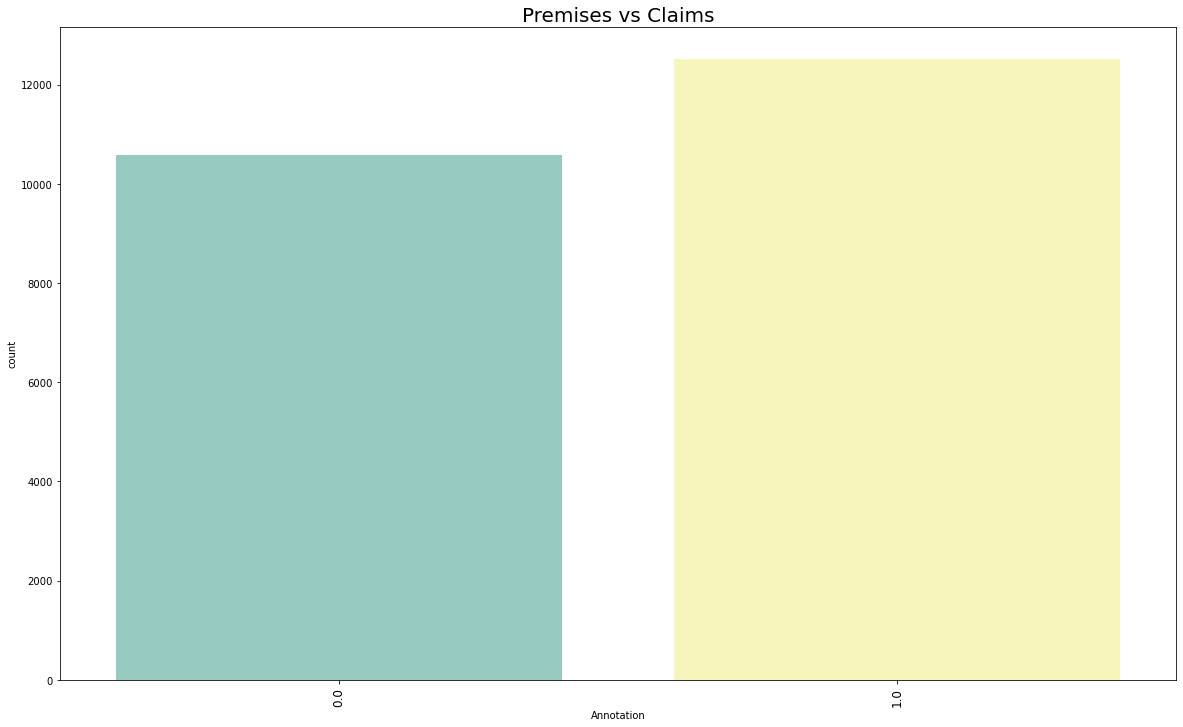

In [54]:
plt.figure(figsize=(20,12))
sns.countplot(df2.Annotation.sort_values(), palette="Set3")
plt.title("Premises vs Claims",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df2['Sentences'], df2['Annotation'], test_size=0.3, shuffle=True)

In [56]:
bow_train = bow.fit_transform(X_train).toarray()
bow_test = bow.transform(X_test).toarray()

In [57]:
svm.fit(bow_train, y_train)

SVC(kernel='linear', random_state=1)

In [59]:
#y_pred_train_bow = svm.predict(bow_train)
y_pred_test_bow = svm.predict(bow_test)

In [60]:
#classification report on test set
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_test_bow, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.40      0.47      3127
     class 1       0.60      0.75      0.67      3807

    accuracy                           0.59      6934
   macro avg       0.59      0.57      0.57      6934
weighted avg       0.59      0.59      0.58      6934

